# Zgony według tygodni, GUS
## W podziale na województwa, powiaty i 5-letnie grupy wiekowe

Potrzebne funkcje w plikach:
* helper_functions.py
* govpl_function.py

Uwaga: 
...

## TODO
* ...

In [36]:
"""
Set PYTHONPATH for modules in parallel directory

https://stackoverflow.com/questions/3108285/in-python-script-how-do-i-set-pythonpath/3108301

"""

import sys

try:
    sys.path.index('..') # Or os.getcwd() for this directory
except ValueError:
    sys.path.append('..') # Or os.getcwd() for this directory

#--------------------------------------------------------------

from share.helper_functions import (
    getfile, 
    unzip, 
    xlsx2xls, 
    display_all,
    set_legend_right,
    plot

)
from typing import NamedTuple
from share.gus_functions import (
    GUSparams,
    Analysis
    )
# import govpl_functions as govpl
import pandas as pd
import importlib
import glob
import os
from sorcery import dict_of
import matplotlib.pyplot as plt


In [37]:
params = dict_of(
    data_dir = './gus_data',
    img_dir = './images',
    url =\
    'https://stat.gov.pl/download/gfx/portalinformacyjny/pl/defaultaktualnosci/5468/39/2/1/zgony_wg_tygodni.zip',
    zipfile = 'zgony_wg_tygodni.zip',
    file_prefix = 'Zgony wedêug tygodni w Polsce_',
    file_prefix_terminal = 'Zgony\ wedêug\ tygodni\ w\ Polsce_',
    file_suffix = '.xlsx',
    libreoffice_cmd = 'libreoffice7.2',
    year_start = 2000,
    year_end = 2021
)


In [38]:
mygus = Analysis(params)

In [39]:
mygus.getdata()

Getting GUS data...
Reading ./gus_data/Zgony wedêug tygodni w Polsce_.csv
Done.


In [40]:
mygus.all_years_df

,Wiek zmarłych w latach,NUTS,Podregiony,T01,T02,T03,T04,T05,T06,T07,...,T45,T46,T47,T48,T49,T50,T51,T52,Rok,T53
0,Ogółem,PL,Polska,7913,8292,8970,9380,9474,8591,7841,...,6825,6873.0,7182.0,7173.0,7006.0,7296.0,7402.0,8000.0,2000,NaN
1,Ogółem,PL2,Makroregion Południowy,1629,1695,1805,1792,1754,1597,1520,...,1463,1380.0,1417.0,1444.0,1427.0,1533.0,1535.0,1603.0,2000,NaN
2,Ogółem,PL21,Małopolskie,616,636,676,675,665,649,548,...,584,513.0,555.0,546.0,531.0,601.0,593.0,617.0,2000,NaN
3,Ogółem,PL213,Miasto Kraków,139,162,156,167,162,154,135,...,148,103.0,134.0,126.0,137.0,131.0,140.0,149.0,2000,NaN
4,Ogółem,PL214,Krakowski,128,130,130,148,158,151,116,...,126,110.0,125.0,119.0,125.0,151.0,132.0,129.0,2000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43115,90 i więcej,PL922,Ciechanowski,15,17,11,14,16,14,17,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN
43116,90 i więcej,PL923,Płocki,18,11,9,17,14,11,14,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN
43117,90 i więcej,PL924,Ostrołęcki,21,25,27,19,15,17,16,...,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN
43118,90 i więcej,PL925,Siedlecki,11,17,18,18,19,17,21,...,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN


In [49]:
df = mygus.all_years_df

Q = '(`Wiek zmarłych w latach` == "Ogółem")  & (NUTS == "PL")'

df_og = df.query(Q).copy(deep=True)
df_og.drop(['Wiek zmarłych w latach', 'NUTS', 'Podregiony' ], axis=1, inplace=True)
df_og = df_og.set_index('Rok').T.reset_index(drop=True)
df_og.index.name = 'Tydzień'
if df_og.index.start == 0:
    df_og.index += 1

In [48]:
df_og

Rok,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Tydzień,,,,,,,,,,,,,,,,,,,,,
1,Ogółem,Ogółem,Ogółem,Ogółem,Ogółem,Ogółem,Ogółem,Ogółem,Ogółem,Ogółem,...,Ogółem,Ogółem,Ogółem,Ogółem,Ogółem,Ogółem,Ogółem,Ogółem,Ogółem,Ogółem
2,PL,PL,PL,PL,PL,PL,PL,PL,PL,PL,...,PL,PL,PL,PL,PL,PL,PL,PL,PL,PL
3,Polska,Polska,Polska,Polska,Polska,Polska,Polska,Polska,Polska,Polska,...,Polska,Polska,Polska,Polska,Polska,Polska,Polska,Polska,Polska,Polska
4,7913,7662,6889,8117,7568,7477,7504,7549,8160,8421,...,7557,9309,7533,7984,8215,9279,8372,8668,8463,11470
5,8292,7359,7053,7699,7741,7225,7298,7381,7773,8843,...,7442,9030,7317,7754,7920,10225,8078,8586,8242,10970
6,8970,7232,7286,7442,7648,7374,7425,7242,7851,8794,...,7655,9041,7261,7800,7683,9875,8639,8700,8059,11016
7,9380,7548,7027,7425,7555,7473,7964,7354,7657,9472,...,7368,8938,7463,7559,7977,9946,8793,8798,8015,10388
8,9474,7319,6771,7405,7802,7461,7639,7332,7437,9169,...,7728,8803,7713,7963,7970,10076,8987,9362,8560,9880
9,8591,7469,6844,7613,7972,7688,7403,7636,7588,9141,...,8133,8401,7837,8166,8145,9432,9088,9269,8343,9925


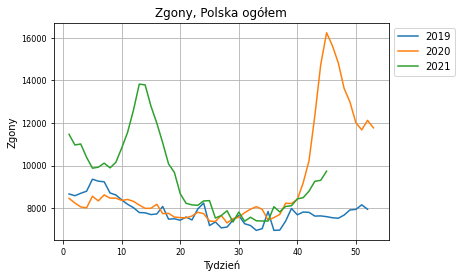

In [46]:
# %load_ext autoreload
# %autoreload

# from share.helper_functions import (
#     getfile, 
#     unzip, 
#     xlsx2xls, 
#     display_all,
#     set_legend_right,
#     plot
# )



plotopts = dict_of(
    plotdf=df_og, 
    cols_to_plot = [2019,2020,2021], 
    ylabel = 'Zgony',
    title = 'Zgony, Polska ogółem',
    fontsize = 8
    )

plot(**plotopts);

In [44]:
# df = mygus.all_years_df

# Q = '(`Wiek zmarłych w latach` == "Ogółem")  & (Podregiony == "Lubelskie")'
# dfl=dict()
# dfl["Lubelskie"] = (df.query(Q).copy(deep=True))
# dfl["Lubelskie"].drop(['Wiek zmarłych w latach', 'NUTS', 'Podregiony' ], axis=1, inplace=True)
# dfl["Lubelskie"] = dfl["Lubelskie"].set_index('Rok').T.reset_index(drop=True)
# dfl["Lubelskie"].index.name = 'Tydzień'

# Q = '(`Wiek zmarłych w latach` == "Ogółem")  & (Podregiony == "Podlaskie")'

# dfl["Podlaskie"] = (df.query(Q).copy(deep=True))
# dfl["Podlaskie"].drop(['Wiek zmarłych w latach', 'NUTS', 'Podregiony' ], axis=1, inplace=True)
# dfl["Podlaskie"] = dfl["Podlaskie"].set_index('Rok').T.reset_index(drop=True)
# dfl["Podlaskie"].index.name = 'Tydzień'

# plotopts = dict_of(
#     plotdf=[dfl["Lubelskie"],dfl["Podlaskie"]], 
#     cols_to_plot = [2019,2020,2021], 
#     ylabel = 'Zgony',
#     title = 'Zgony, Lubelskie',
#     fontsize = 8
#     )

# plot(**plotopts);

In [45]:
# dfl.values()